In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score,cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, SGDRegressor,Lasso,Ridge,LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,BaggingRegressor,GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor,VotingRegressor, StackingRegressor,VotingRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import lightgbm as lgb
from catboost import CatBoostRegressor

import warnings
warnings.filterwarnings("ignore", category=SyntaxWarning)



/usr/local/lib/python3.12/dist-packages/sqlalchemy/orm/query.py:195: SyntaxWarning: "is not" with 'tuple' literal. Did you mean "!="?
  if entities is not ():


In [9]:
# Télécharger le dataset
path = kagglehub.dataset_download("camnugent/california-housing-prices")

print("Path to dataset files:", path)
print("Contenu du dossier:", os.listdir(path))

# Charger le fichier CSV
df = pd.read_csv(os.path.join(path, "housing.csv"))
df.head()


Path to dataset files: /kaggle/input/california-housing-prices
Contenu du dossier: ['housing.csv']


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [10]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [11]:
df.isnull().sum()
# il y'a 207 valeur manquant dans total-bedrooms

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [12]:
print("Number of duplicates:" , df.duplicated().sum()) # number of duplicated : 0

Number of duplicates: 0


In [13]:
print(df['longitude'].value_counts())
print(df['latitude'].value_counts())
print(df['housing_median_age'].value_counts())
print(df['total_rooms'].value_counts())
print(df['total_bedrooms'].value_counts())
print(df['population'].value_counts())
print(df['households'].value_counts())
print(df['median_income'].value_counts())
print(df['median_house_value'].value_counts())

longitude
-118.31    162
-118.30    160
-118.29    148
-118.27    144
-118.32    142
          ... 
-123.13      1
-123.43      1
-123.12      1
-116.27      1
-123.26      1
Name: count, Length: 844, dtype: int64
latitude
34.06    244
34.05    236
34.08    234
34.07    231
34.04    221
        ... 
41.53      1
35.86      1
35.85      1
35.89      1
41.20      1
Name: count, Length: 862, dtype: int64
housing_median_age
52.0    1273
36.0     862
35.0     824
16.0     771
17.0     698
34.0     689
26.0     619
33.0     615
18.0     570
25.0     566
32.0     565
37.0     537
15.0     512
19.0     502
27.0     488
24.0     478
30.0     476
28.0     471
20.0     465
29.0     461
31.0     458
23.0     448
21.0     446
14.0     412
22.0     399
38.0     394
39.0     369
42.0     368
44.0     356
43.0     353
40.0     304
13.0     302
41.0     296
45.0     294
10.0     264
11.0     254
46.0     245
5.0      244
12.0     238
8.0      206
9.0      205
47.0     198
4.0      191
48.0     177
7.0 

In [14]:
imputer = SimpleImputer(strategy="median")
df["total_bedrooms"] = imputer.fit_transform(df[["total_bedrooms"]])
##on remplace les valeur manquant par la median

# **Séparation features / target**

In [15]:
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]
X.head()


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income ocean_proximity  
0       322.0       126.0         8.3252        NEAR BAY  
1      2401.0      1138.0         8.3014        NEAR BAY  
2       496.0       177.0         7.2574        NEAR BAY  
3       558.0       219.0         5.6431        NEAR BAY  
4       565.0       259.0         3.8462        NEAR BAY

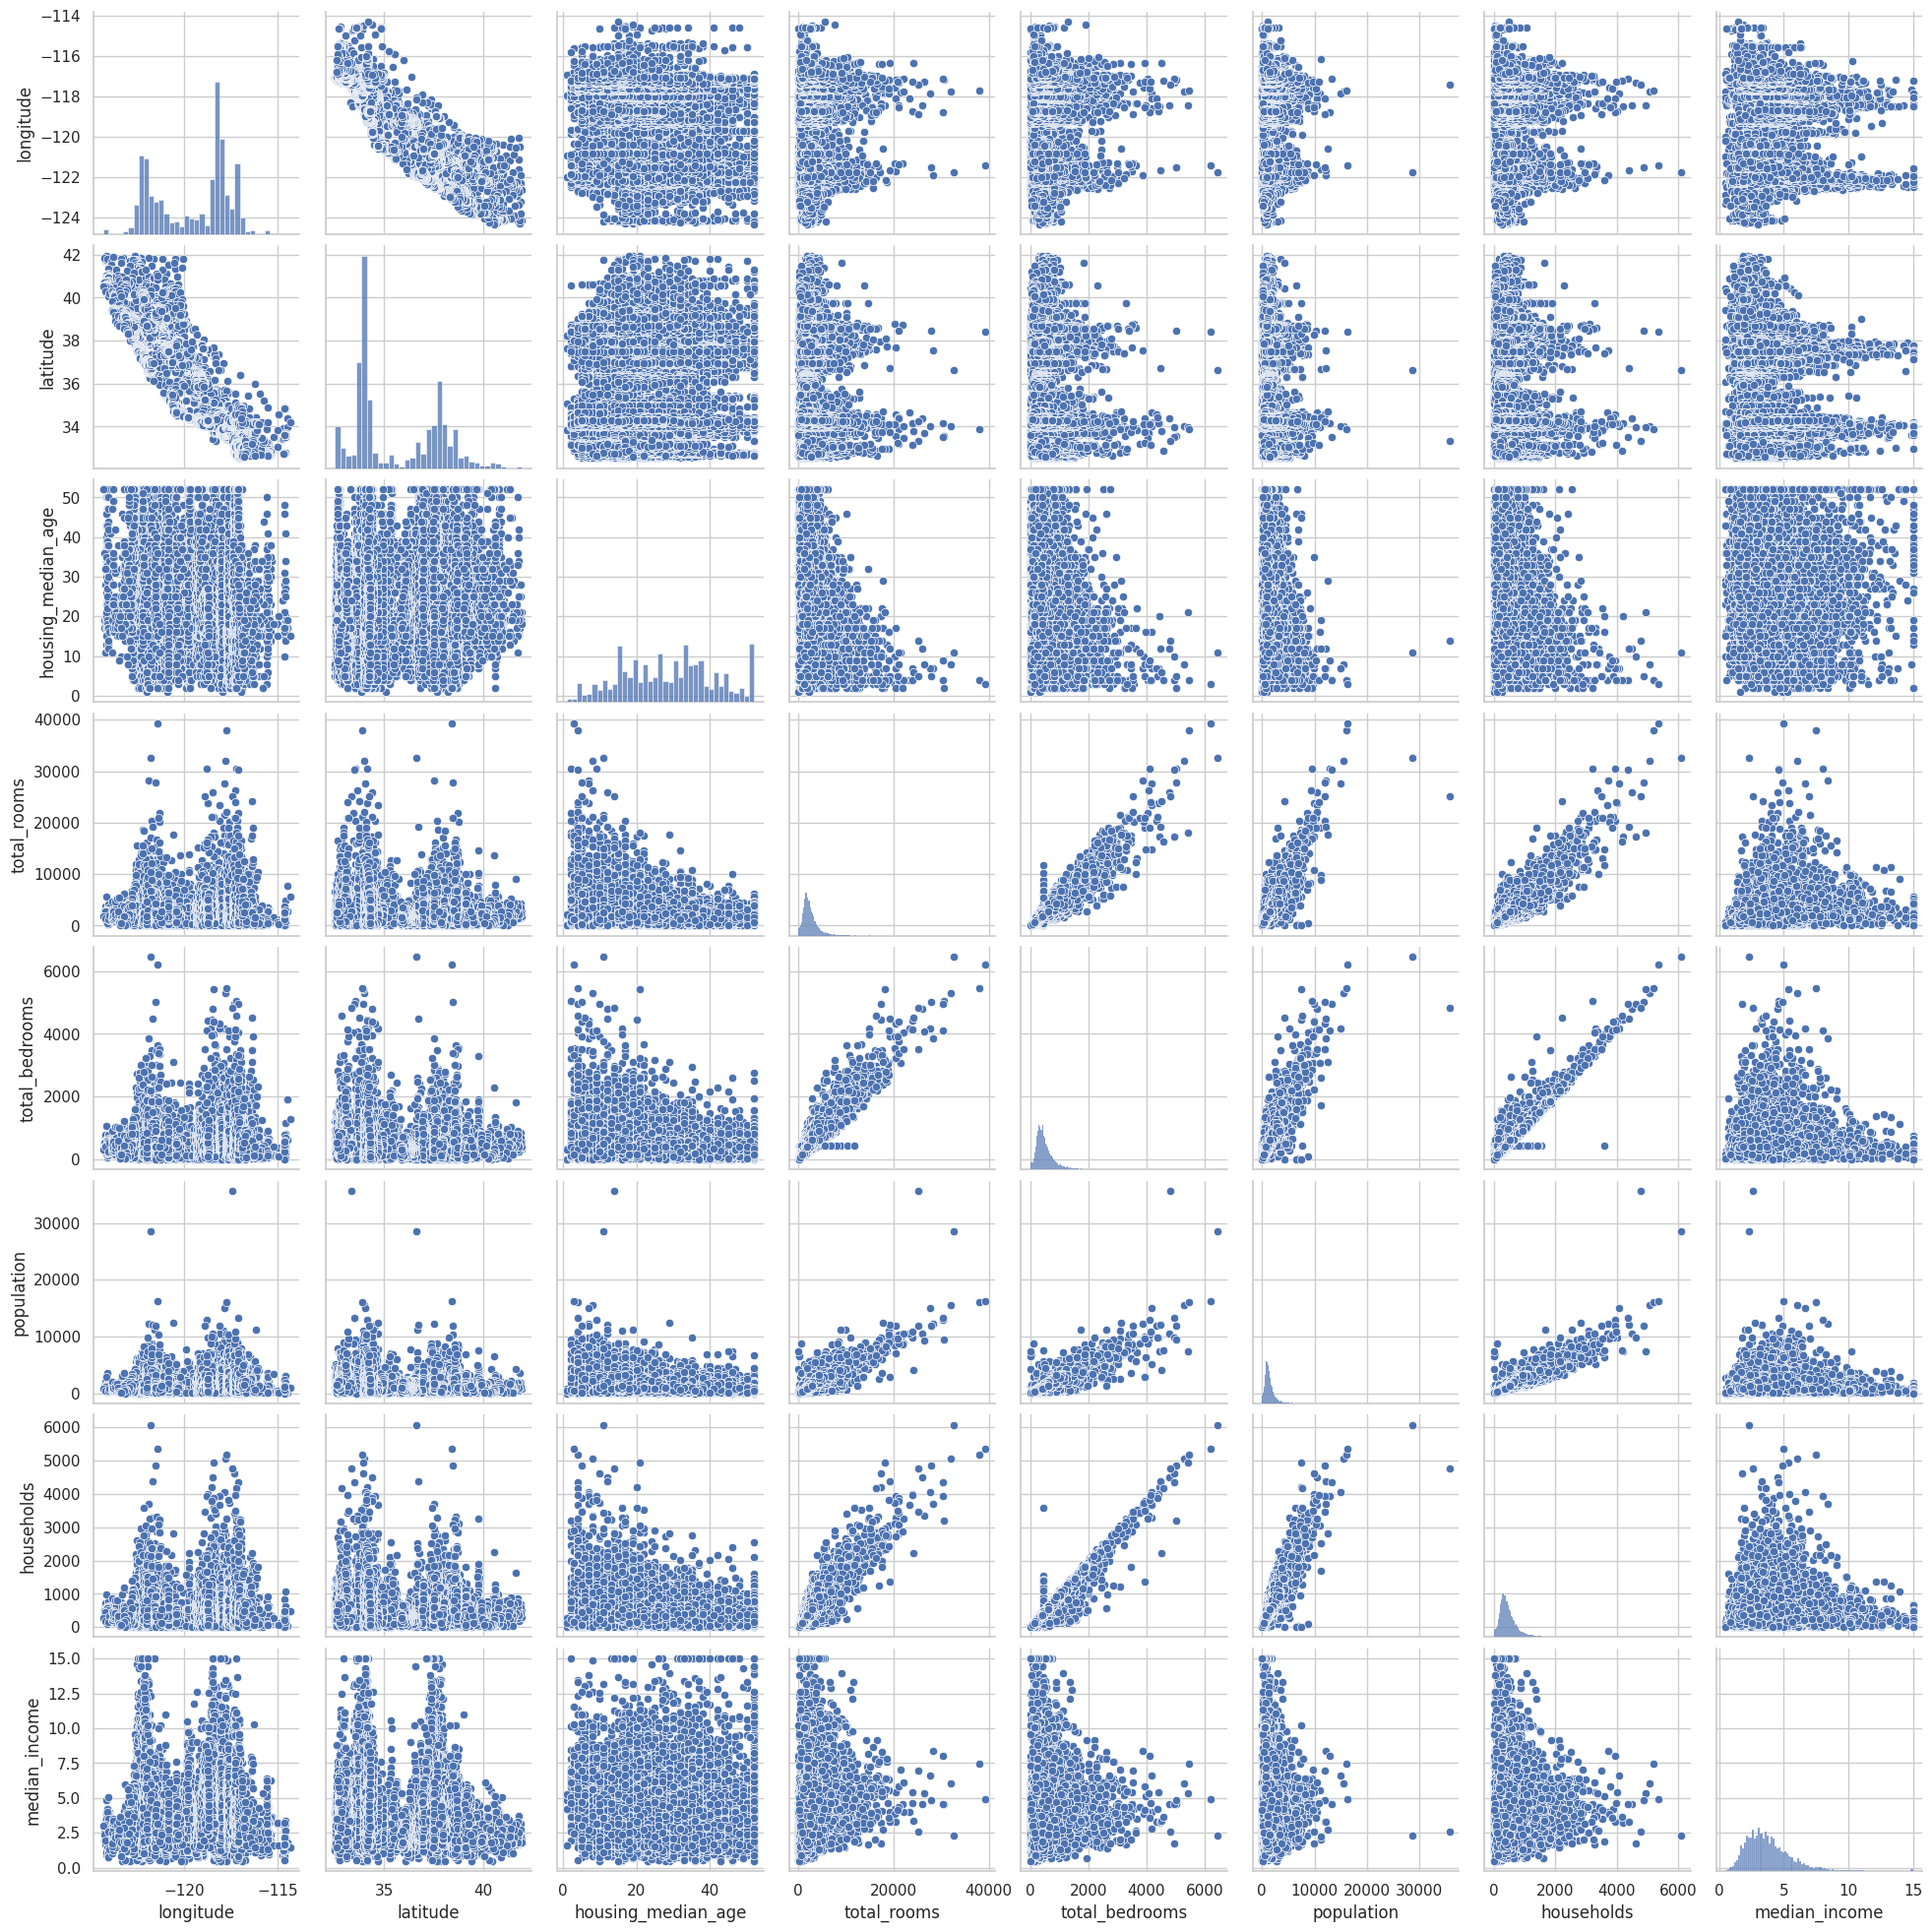

In [16]:
num_features = X.select_dtypes(include=np.number).columns
cat_features = X.select_dtypes(include=object).columns
#num_features = Index des colonnes numériques.
#cat_features = Index des colonnes catégorielles(ocean_proximity).
# Create a pairplot matrix
sns.set(style="whitegrid")
pairplot = sns.pairplot(X[num_features], diag_kind="hist",  corner=False)
# Display the visualization
plt.show()

/tmp/ipykernel_55/1218032273.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=X, x=col, palette='Set2')


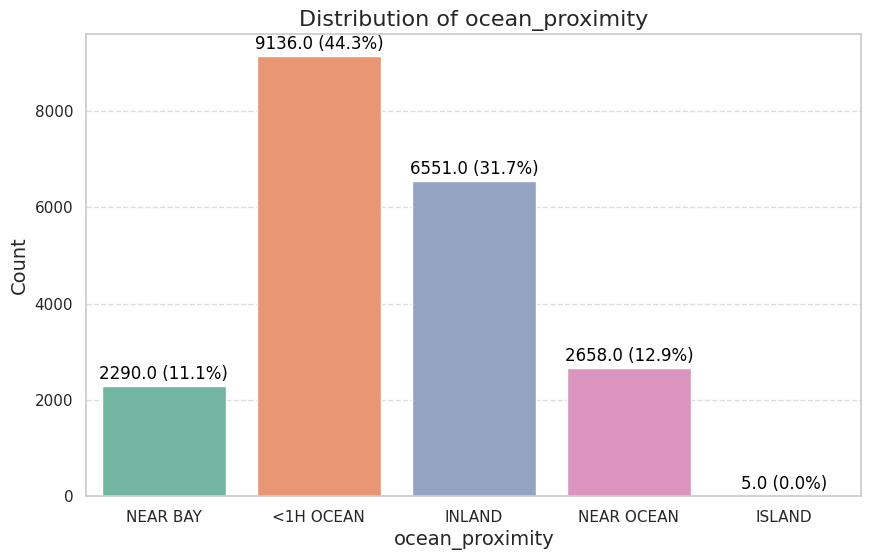

In [17]:

# Vérifier qu'il y a bien au moins une colonne catégorielle
if len(cat_features) > 0:
    col = cat_features[0]   # Comme tu dis, il n'y en a qu'une
    plt.figure(figsize=(10, 6))
    
    # Countplot
    ax = sns.countplot(data=X, x=col, palette='Set2')
    
    # Titre et labels
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    
    # Ajouter les annotations (nombre + pourcentage)
    total_count = len(X)
    for p in ax.patches:
        height = p.get_height()
        percentage = (height / total_count) * 100
        ax.annotate(f'{height} ({percentage:.1f}%)',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='baseline',
                    fontsize=12,
                    color='black',
                    xytext=(0, 5),
                    textcoords='offset points')
    
    # Grille pour lisibilité
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("Aucune colonne catégorielle trouvée.")


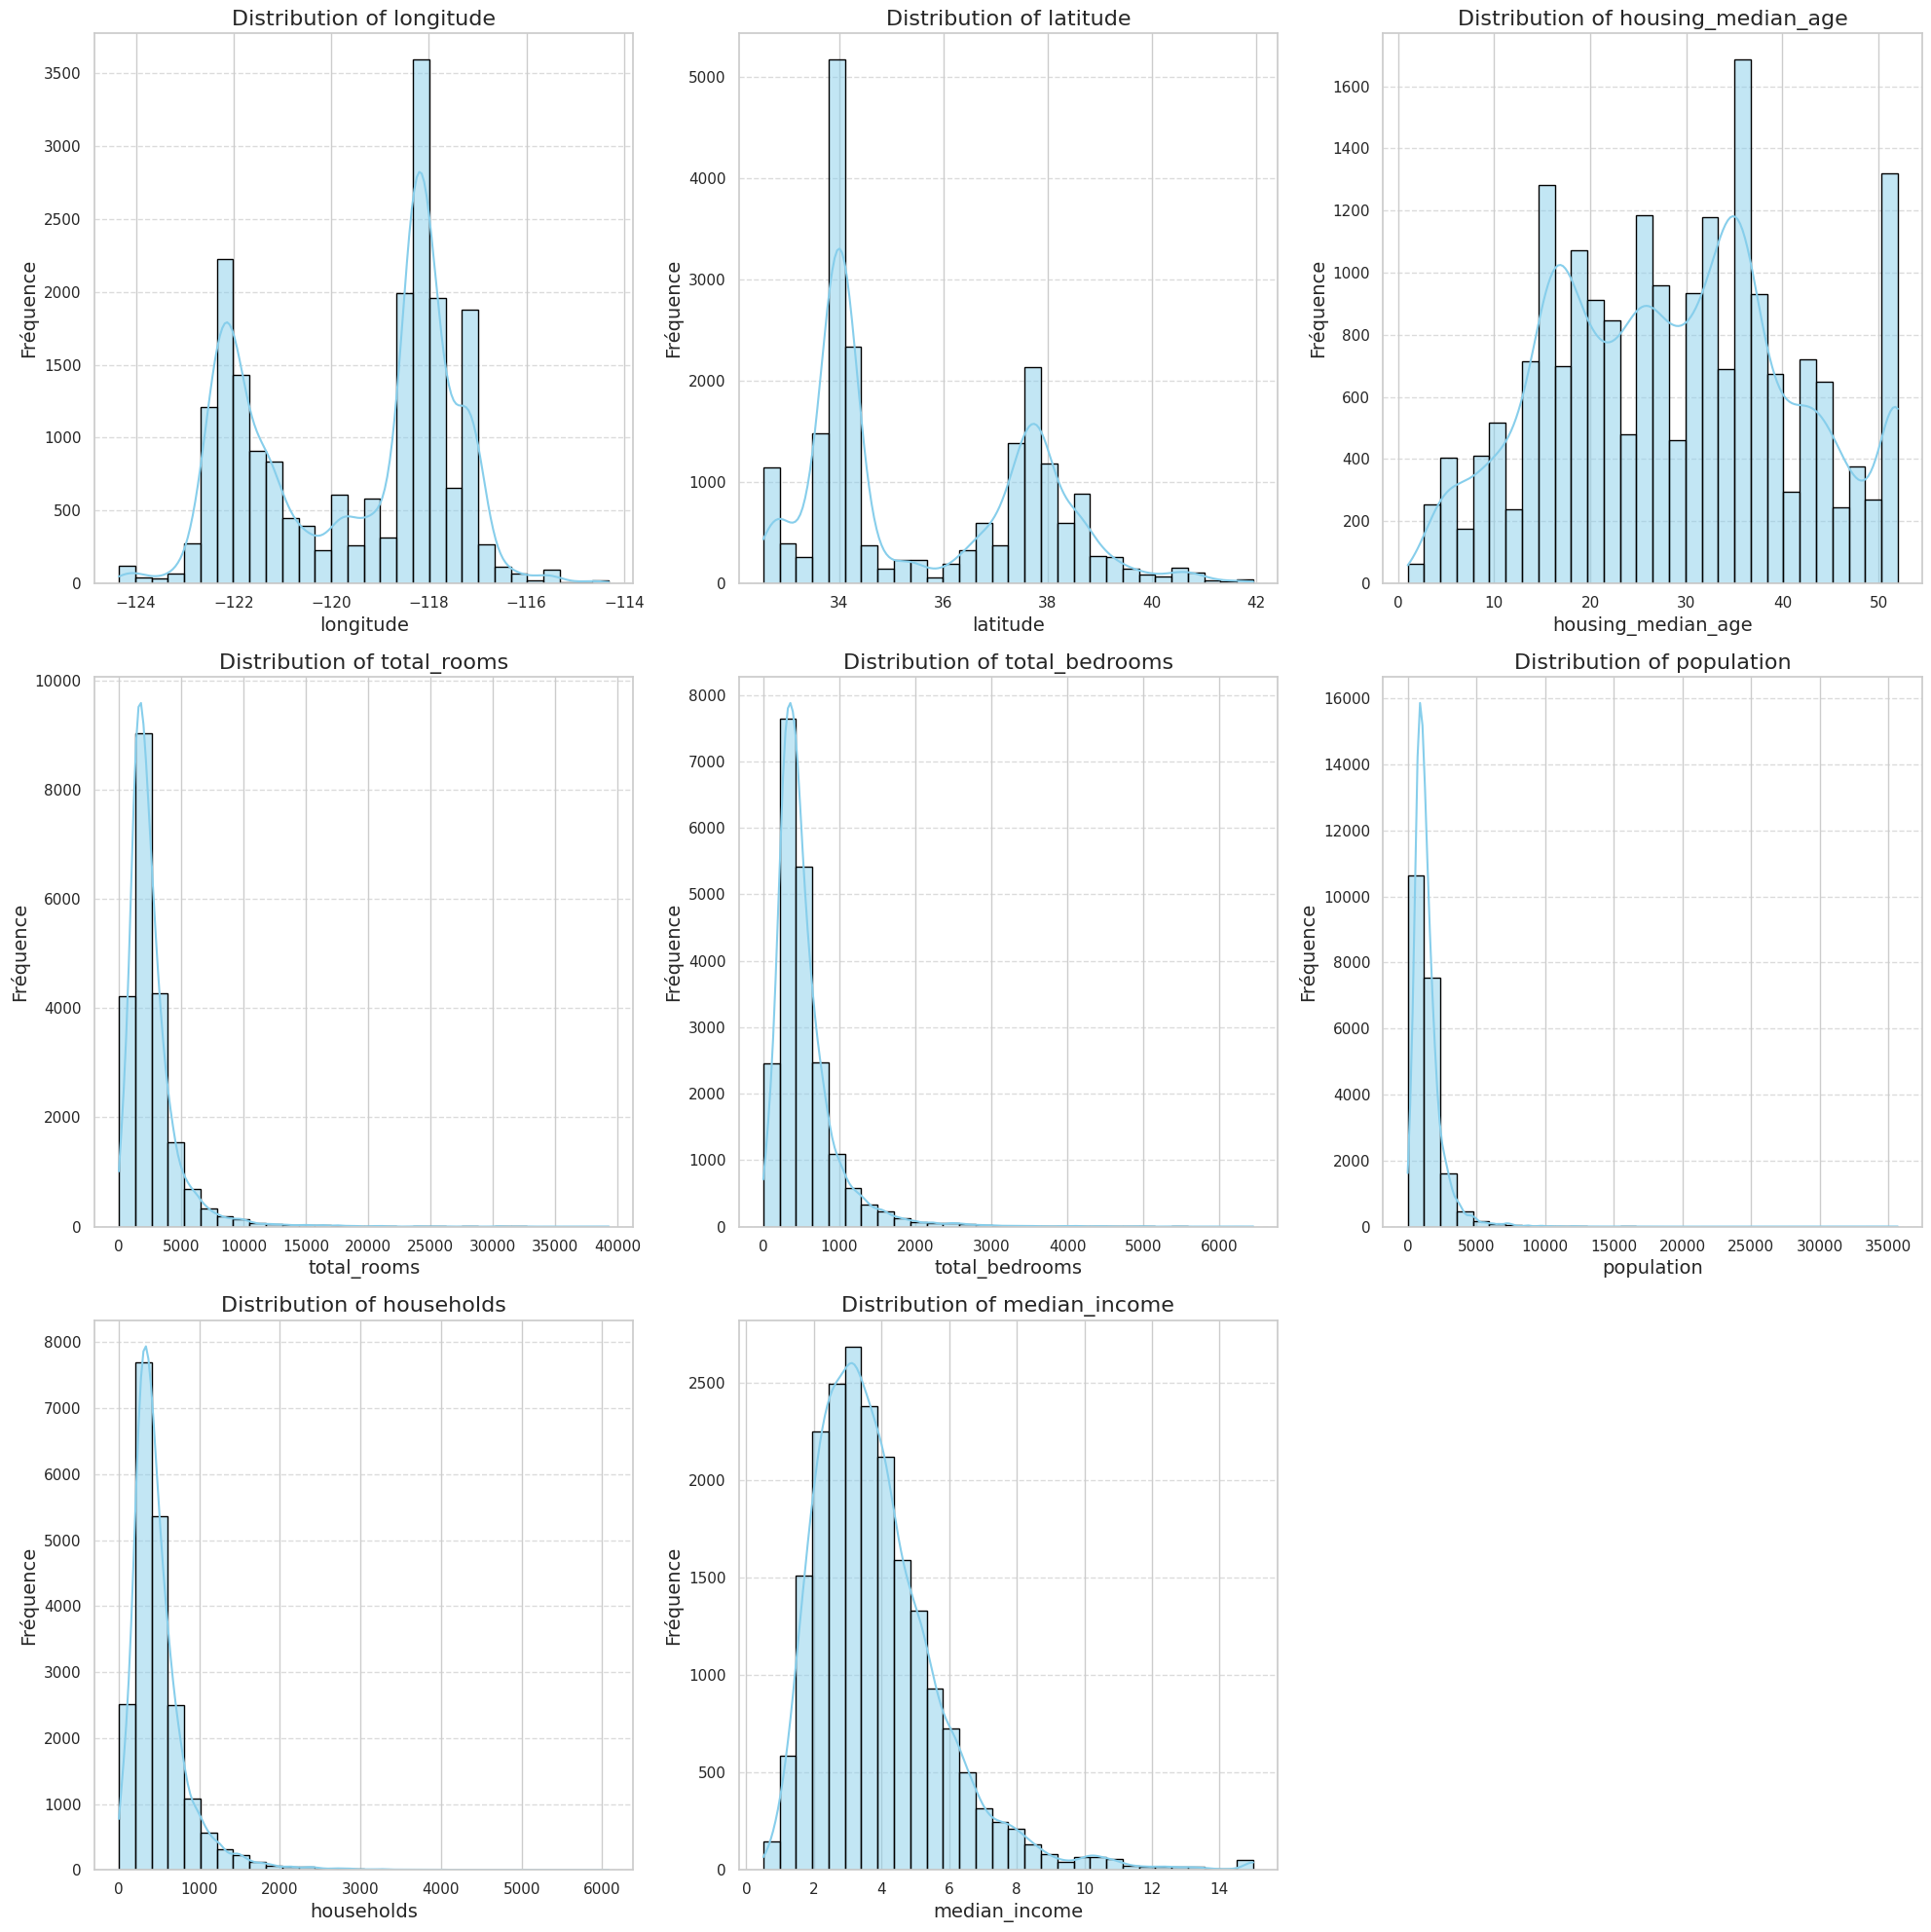

In [18]:
# Définir la taille de la figure
plt.figure(figsize=(20, 20))

# Nombre de colonnes et lignes pour les subplots
n_columns = 3
n_rows = (len(num_features) + n_columns - 1) // n_columns

# Boucle sur chaque variable numérique
for i, col in enumerate(num_features):
    plt.subplot(n_rows, n_columns, i + 1)
    sns.histplot(X[col], bins=30, kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Fréquence', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajuster la mise en page
plt.tight_layout()
plt.show()


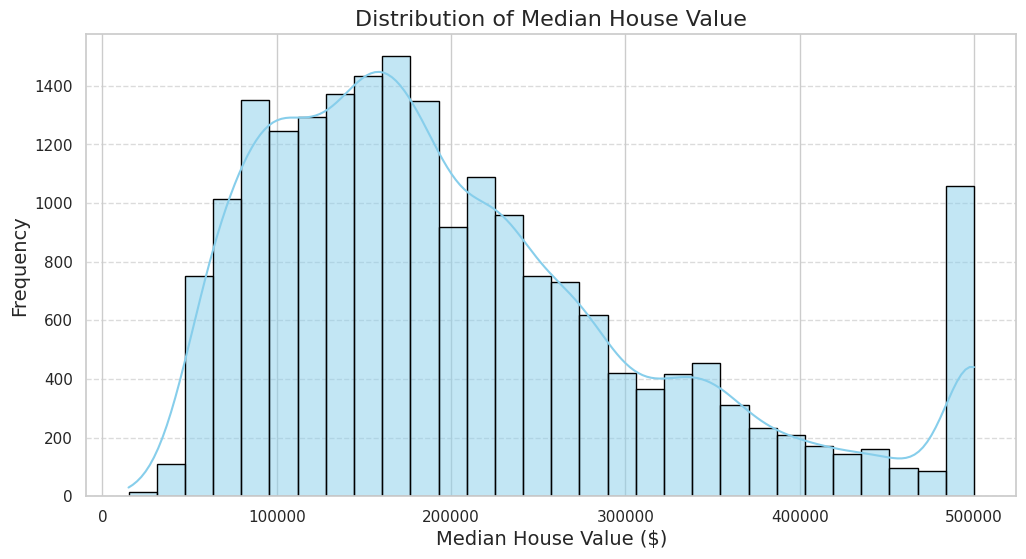

In [19]:

# Visualiser la distribution de la target
plt.figure(figsize=(12, 6))
sns.histplot(y, bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Median House Value', fontsize=16)
plt.xlabel('Median House Value ($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# **Pipeline preprocessing**

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  
count    20640.000000  20640.000000  20640.000000   20640.000000  
mean       536.838857   1425.476744    499.539680       3.870671  
std        419.391878   1132.462122    382.329753       1.899822  
min          1.000000      3.000000      1.000000       0.499900  
25%        297.000000    

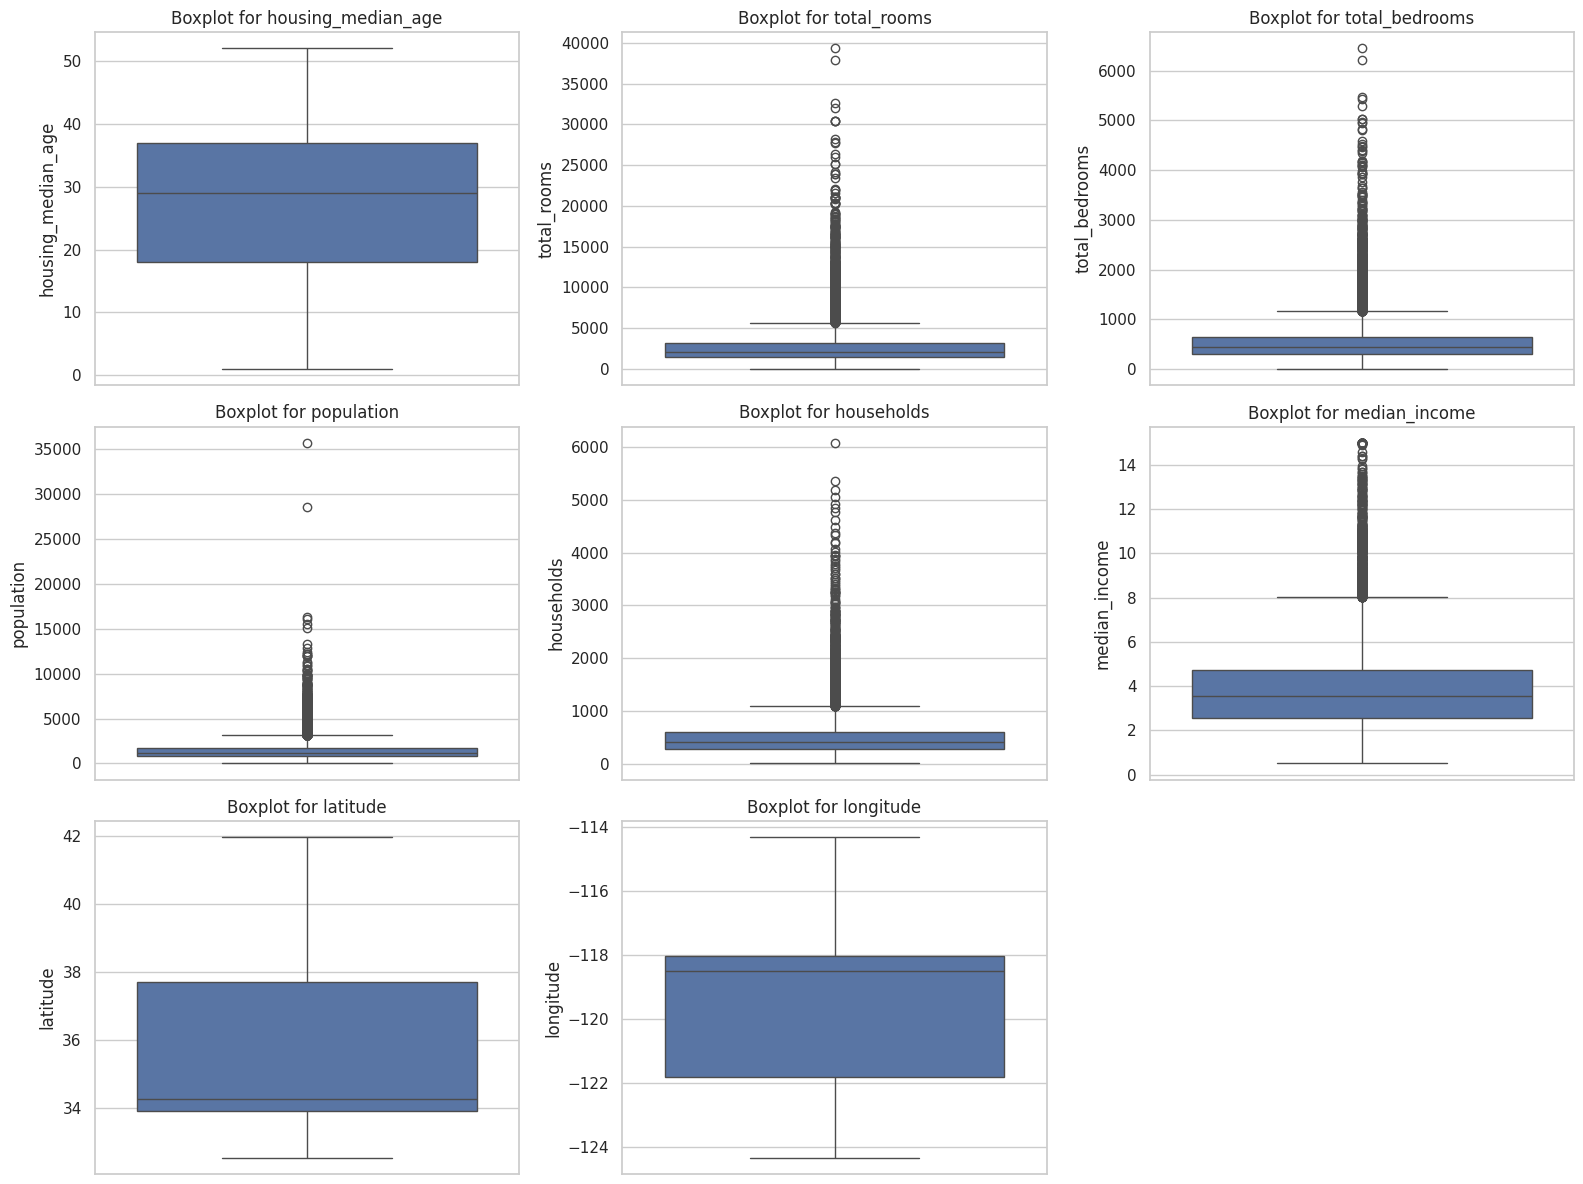

In [20]:


# Afficher les statistiques descriptives des colonnes numériques
print(X.describe())

# Liste des variables continues dans le dataset California Housing
continuous_vars = ['housing_median_age',
                   'total_rooms',
                   'total_bedrooms',
                   'population',
                   'households',
                   'median_income',
                   'latitude',
                   'longitude']

# Créer les boxplots pour détecter les outliers
plt.figure(figsize=(16, 12))
for i, feature in enumerate(continuous_vars, 1):
    plt.subplot(3, 3, i)  # grille 3x3 (ajustée selon le nombre de variables)
    sns.boxplot(y=X[feature])
    plt.title(f'Boxplot for {feature}', fontsize=12)

plt.tight_layout()
plt.show()


In [21]:
# Handling outliers by capping at 1.5*IQR (Interquartile Range)
for feature in continuous_vars:
    # Calculate the first (Q1) and third (Q3) quartiles of the feature
    Q1 = X[feature].quantile(0.25)  # 25th percentile (Q1)
    Q3 = X[feature].quantile(0.75)  # 75th percentile (Q3)

    # Compute the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the values below the lower bound to the lower bound
    X[feature] = np.where(X[feature] < lower_bound, lower_bound, X[feature])

    # Cap the values above the upper bound to the upper bound
    X[feature] = np.where(X[feature] > upper_bound, upper_bound, X[feature])


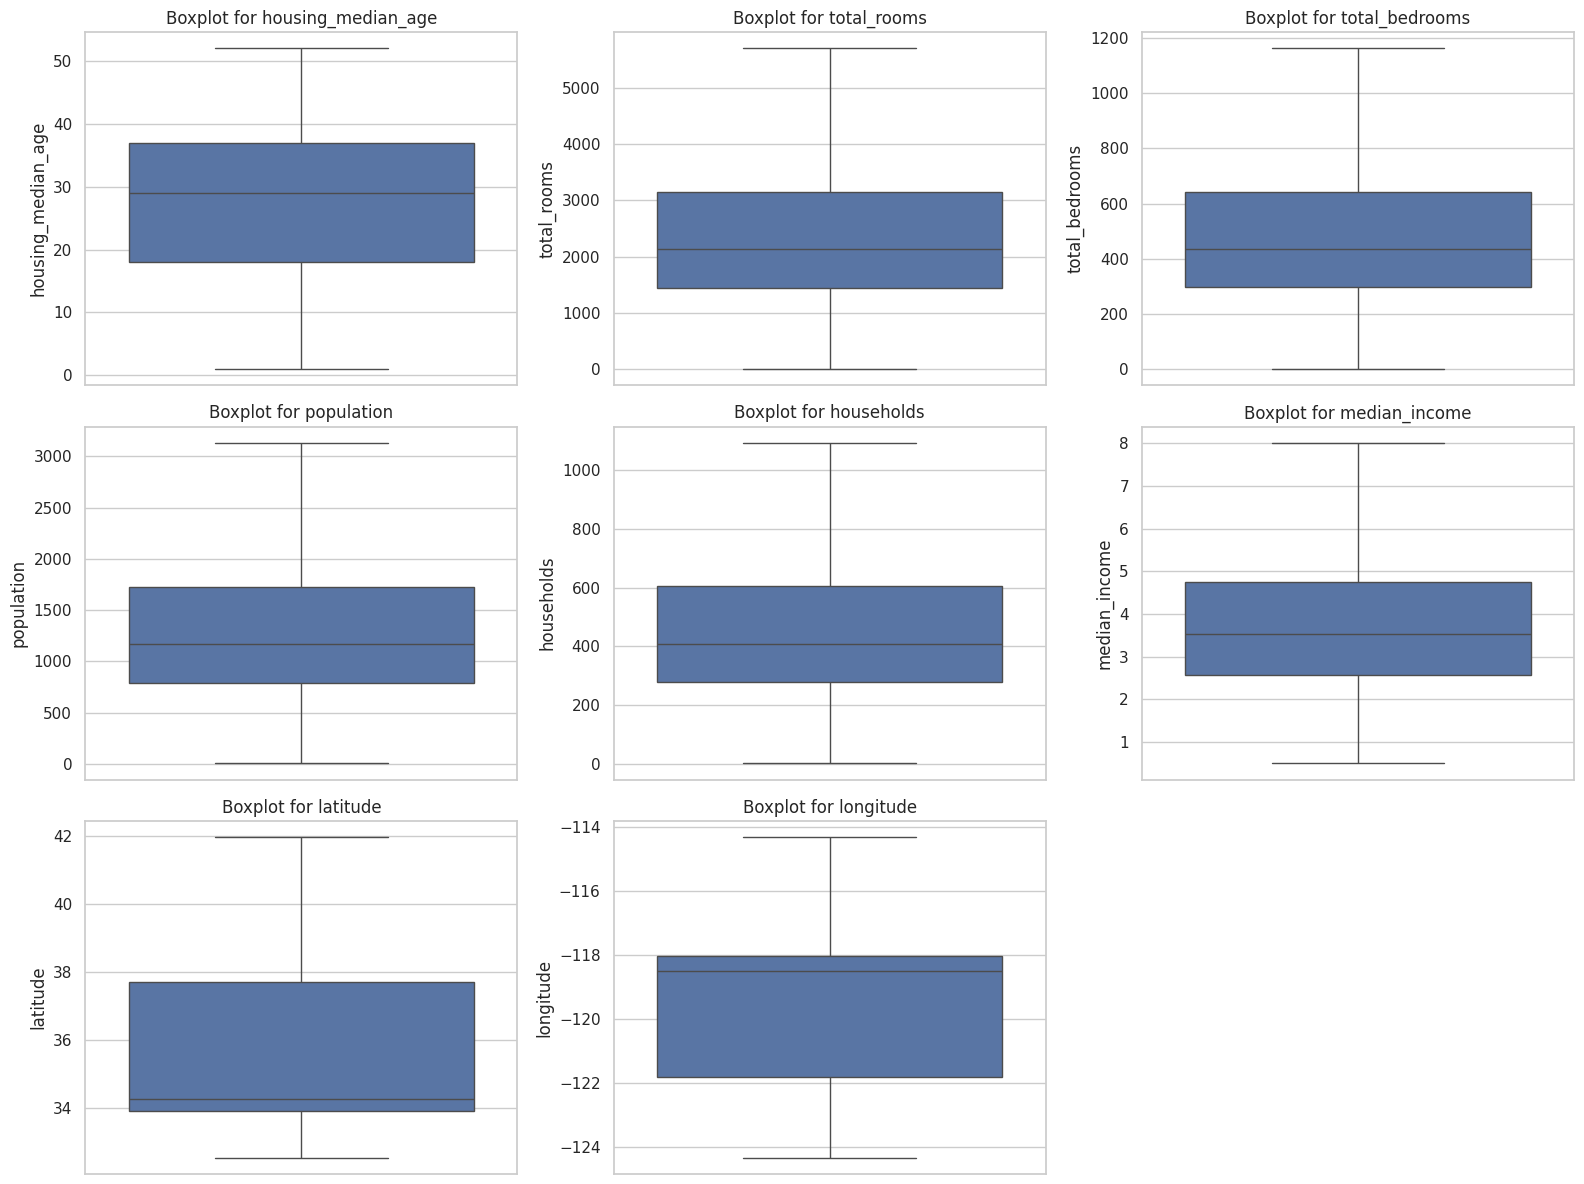

In [22]:
# List of continuous variables
continuous_vars = ['housing_median_age',
                   'total_rooms',
                   'total_bedrooms',
                   'population',
                   'households',
                   'median_income',
                   'latitude',
                   'longitude']

# Plotting boxplots to identify outliers
plt.figure(figsize=(16,12))
for i, feature in enumerate(continuous_vars, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(X[feature])
    plt.title(f'Boxplot for {feature}')
plt.tight_layout()
plt.show()

In [23]:
print("Number of duplicates:", X.duplicated().sum())

Number of duplicates: 0


# ****Standardisation (Z-score normalization)****

In [24]:
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
    #met toutes les variables numériques sur la même échelle (moyenne = 0, variance = 1).
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, num_features),
    ("cat", categorical_transformer, cat_features)
    ##: transforme les catégories (ocean_proximity) en colonnes binaires (0/1).
])


In [25]:

# Appliquer le préprocesseur
X_transformed = preprocessor.fit_transform(X)

# Récupérer les noms des colonnes encodées
encoded_columns = preprocessor.named_transformers_["cat"]["encoder"].get_feature_names_out(cat_features)

# Fusionner noms des colonnes numériques + colonnes encodées
all_features = list(num_features) + list(encoded_columns)

# Vérifier si c'est une sparse matrix ou un ndarray
if isinstance(X_transformed, np.ndarray):
    X_transformed_df = pd.DataFrame(X_transformed, columns=all_features)
else:
    X_transformed_df = pd.DataFrame(X_transformed.toarray(), columns=all_features)

# Afficher les 5 premières lignes
print(X_transformed_df.head())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0  -1.327835  1.052548            0.982143    -1.117285       -1.309916   
1  -1.322844  1.043185           -0.607019     2.329936        2.128690   
2  -1.332827  1.038503            1.856182    -0.697327       -1.095223   
3  -1.337818  1.038503            1.856182    -0.835405       -0.936843   
4  -1.337818  1.038503            1.856182    -0.582857       -0.778463   

   population  households  median_income  ocean_proximity_<1H OCEAN  \
0   -1.325821   -1.291972       2.541006                        0.0   
1    1.389936    2.348314       2.541006                        0.0   
2   -1.098528   -1.099883       2.085156                        0.0   
3   -1.017539   -0.941691       1.111288                        0.0   
4   -1.008395   -0.791033       0.027262                        0.0   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                     0.0                  

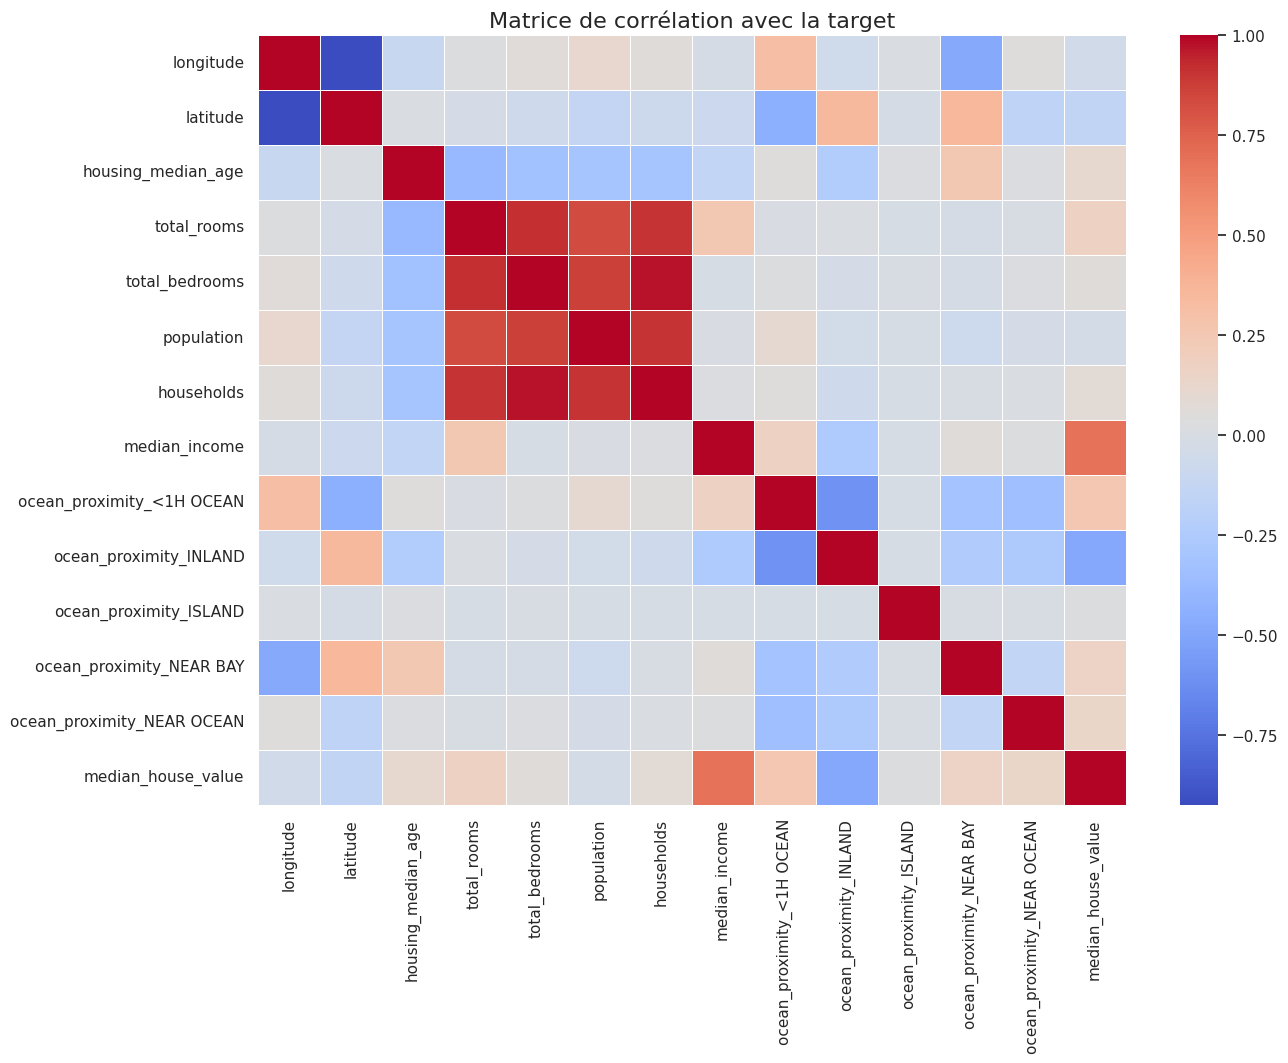

Corrélations avec la target (triées):
 median_house_value            1.000000
median_income                 0.689001
ocean_proximity_<1H OCEAN     0.256617
total_rooms                   0.171832
ocean_proximity_NEAR BAY      0.160284
ocean_proximity_NEAR OCEAN    0.141862
housing_median_age            0.105623
households                    0.078723
total_bedrooms                0.060162
ocean_proximity_ISLAND        0.023416
population                   -0.032739
longitude                    -0.045967
latitude                     -0.144160
ocean_proximity_INLAND       -0.484859
Name: median_house_value, dtype: float64


In [26]:
# Fusionner X transformé avec la target
df_corr = pd.concat([X_transformed_df, y.reset_index(drop=True)], axis=1)

# Calculer la matrice de corrélation
corr_matrix = df_corr.corr()

# Définir la taille de la figure
plt.figure(figsize=(14, 10))

# Tracer la heatmap
sns.heatmap(corr_matrix,
            annot=False,       # trop de colonnes, annot=False pour lisibilité
            cmap="coolwarm",   # palette de couleurs
            fmt=".2f",         # format des nombres
            linewidths=.5)

plt.title("Matrice de corrélation avec la target", fontsize=16)
plt.show()

# Afficher les corrélations les plus fortes avec la target
target_corr = corr_matrix["median_house_value"].sort_values(ascending=False)
print("Corrélations avec la target (triées):\n", target_corr)


# **Train / Test Split**

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)


# **Baseline Regression Models**

In [28]:
def LinearRegression_with_gradient_descent(X_train_GD, Y_train_GD, alpha, iteration):
    m = X_train_GD.shape[0]  # Nombre d'exemples
    ones = np.ones((m, 1))
    XX = np.concatenate((ones, X_train_GD), axis=1)  # Ajout colonne biais
    n = XX.shape[1]   # Nombre de paramètres
    Theta = np.zeros(n)   # Initialisation
    h = np.dot(XX, Theta)  # Hypothèse initiale

    cost = np.zeros(iteration)
    for i in range(iteration):
        Theta[0] -= (alpha / m) * np.sum(h - Y_train_GD)
        for j in range(1, n):
            Theta[j] -= (alpha / m) * np.sum((h - Y_train_GD) * XX[:, j])
        h = np.dot(XX, Theta)
        cost[i] = (1 / (2 * m)) * np.sum(np.square(h - Y_train_GD))

    return cost, Theta
alpha = 0.01
iterations = 2000

cost, theta = LinearRegression_with_gradient_descent(X_train_transformed, y_train.values, alpha, iterations)

print("Bias (θ0):", theta[0])
print("Theta (θ1, θ2, ...):", theta[1:])
# Ajouter la colonne biais
X_train_with_bias = np.concatenate((np.ones((X_train_transformed.shape[0], 1)), X_train_transformed), axis=1)
y_pred_train = np.dot(X_train_with_bias, theta)

# R² et MSE sur train
r2 = r2_score(y_train, y_pred_train)
mse = mean_squared_error(y_train, y_pred_train)

print(f"R²: {r2:.2f}")
print(f"MSE: {mse:.2f}")

# Évaluation sur test
X_test_with_bias = np.concatenate((np.ones((X_test_transformed.shape[0], 1)), X_test_transformed), axis=1)
y_pred_test = np.dot(X_test_with_bias, theta)

r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"R² (test): {r2_test:.2f}")
print(f"MSE (test): {mse_test:.2f}")

# R² ajusté sur test
n = len(y_test)
k = X_test_transformed.shape[1]
r2_adjusted = 1 - (1 - r2_test) * (n - 1) / (n - k - 1)
print(f"Adjusted R² (test): {r2_adjusted:.2f}")


Bias (θ0): 168071.1847767498
Theta (θ1, θ2, ...): [-34059.8270583  -34287.38458357  16810.3235082   -9870.52257987
  37783.67045659 -48891.38409117  26571.47394035  75816.27654773
  55440.68787308   5168.27766482   1018.55984008  46856.18573421
  59587.47366456]
R²: 0.66
MSE: 4481546250.95
R² (test): 0.63
MSE (test): 4800180069.24
Adjusted R² (test): 0.63


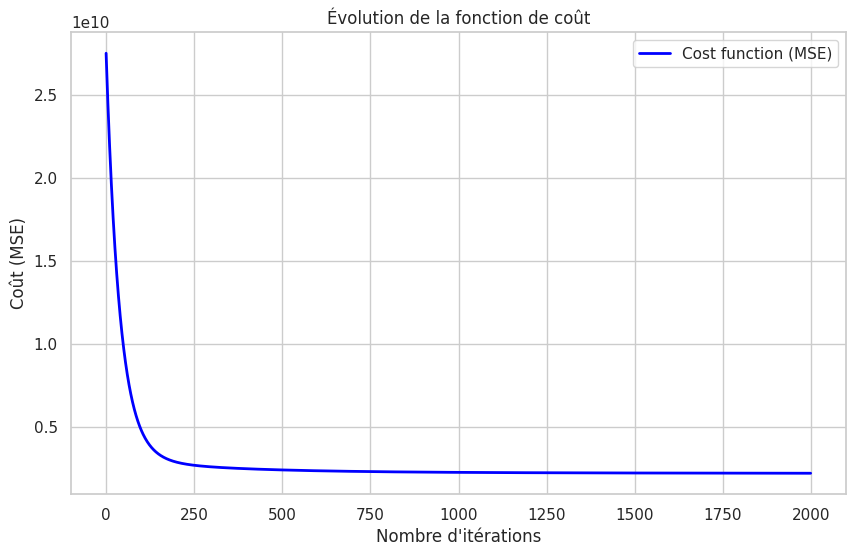

Minimal cost = 2240773125.4730496
Cost after 2000 iterations = 2240773125.4730496


In [29]:
# Courbe de la fonction de coût
plt.figure(figsize=(10,6))
plt.plot(cost, label="Cost function (MSE)", color="blue", linewidth=2)
plt.xlabel("Nombre d'itérations")
plt.ylabel("Coût (MSE)")
plt.title("Évolution de la fonction de coût")
plt.grid(True)
plt.legend()
plt.show()

# Afficher le coût minimal et le coût final
print("Minimal cost =", np.min(cost))
print("Cost after 2000 iterations =", cost[-1])


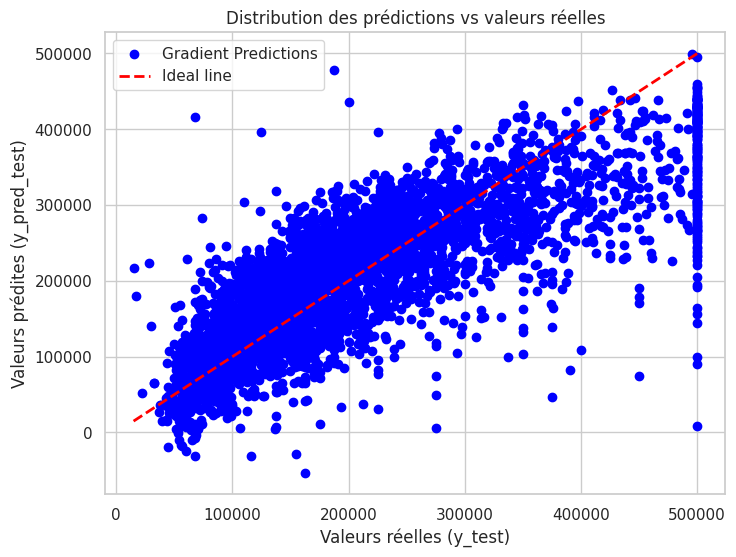

In [30]:
# Ajouter la colonne biais au jeu de test transformé
X_test_with_bias = np.concatenate((np.ones((X_test_transformed.shape[0], 1)), X_test_transformed), axis=1)

# Prédictions sur le jeu de test
y_pred_test = np.dot(X_test_with_bias, theta)

# Visualisation : valeurs réelles vs prédictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='blue', label='Gradient Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linestyle='--', linewidth=2, label='Ideal line')
plt.xlabel('Valeurs réelles (y_test)')
plt.ylabel('Valeurs prédites (y_pred_test)')
plt.title('Distribution des prédictions vs valeurs réelles')
plt.legend()
plt.grid(True)
plt.show()


**Regularisation with Ridge**

In [31]:

# ⚠️ Utiliser les données prétraitées (X_train_transformed, X_test_transformed)
ridge_model = Ridge(alpha=0.001)  # alpha contrôle la régularisation (plus grand = plus de pénalité)

# Entraînement du modèle
ridge_model.fit(X_train_transformed, y_train)

# Prédictions sur le test set
y_pred_ridge = ridge_model.predict(X_test_transformed)

# Évaluation du modèle Ridge
ridge_r2 = r2_score(y_test, y_pred_ridge)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)

print("--- Ridge Model Results ---")
print(f"Mean Squared Error (Ridge): {ridge_mse:.2f}")

print("\n--- Bias (intercept) of the Ridge Model ---")
print(ridge_model.intercept_)

print("\n--- Coefficients (theta) of the Ridge Model ---")
print(ridge_model.coef_)

# Nombre d'observations et de variables
n = len(y_test)   # nombre d'observations
k = X_test_transformed.shape[1]  # nombre de variables explicatives

# Calcul du R² ajusté
ridge_r2_adjusted = 1 - (1 - ridge_r2) * (n - 1) / (n - k - 1)

print(f"\nR² (Ridge): {ridge_r2:.2f}")
print(f"Adjusted R²: {ridge_r2_adjusted:.2f}")


--- Ridge Model Results ---
Mean Squared Error (Ridge): 4912809235.88

--- Bias (intercept) of the Ridge Model ---
235271.68649462063

--- Coefficients (theta) of the Ridge Model ---
[-51655.76547539 -52610.43084451  16460.01442705 -29041.45294935
  65967.08129154 -49984.45509183  17531.32706718  81363.93834838
 -16305.04262659 -50948.84622674 107507.57228729 -25589.60827884
 -14664.07660136]

R² (Ridge): 0.63
Adjusted R²: 0.62


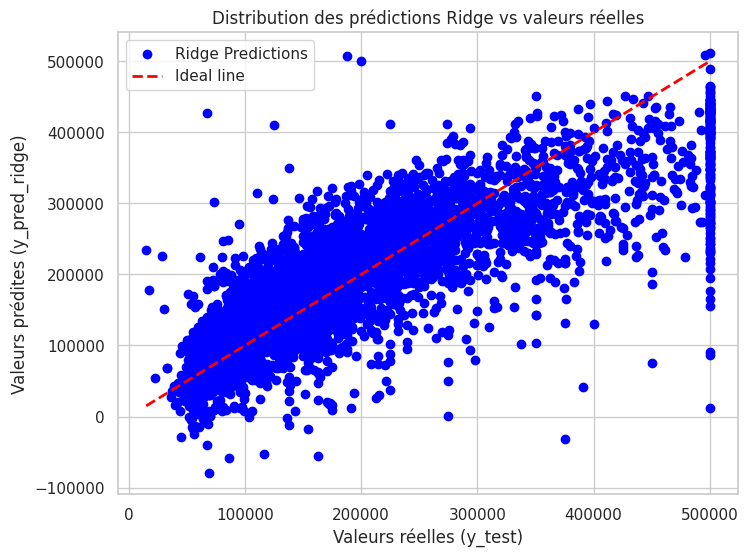

In [32]:
# Visualisation des valeurs réelles vs prédictions (Ridge)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge, color='blue', label='Ridge Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linestyle='--', linewidth=2, label='Ideal line')
plt.xlabel('Valeurs réelles (y_test)')
plt.ylabel('Valeurs prédites (y_pred_ridge)')
plt.title('Distribution des prédictions Ridge vs valeurs réelles')
plt.legend()
plt.grid(True)
plt.show()


In [33]:
from sklearn.linear_model import Lasso
# Définition du modèle Lasso
lasso_model = Lasso(alpha=0.01, max_iter=10000)
 # alpha contrôle la régularisation (plus grand = plus de pénalité)

# Entraînement sur les données transformées
lasso_model.fit(X_train_transformed, y_train)

# Prédictions sur le test set
y_pred_lasso = lasso_model.predict(X_test_transformed)

# Évaluation du modèle Lasso
lasso_r2 = r2_score(y_test, y_pred_lasso)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)

print("\n--- Lasso Model Results ---")
print(f"Mean Squared Error (Lasso): {lasso_mse:.2f}")

print("\n--- Bias (intercept) of the Lasso model ---")
print(lasso_model.intercept_)

print("\n--- Theta (coefficients) of the Lasso model ---")
print(lasso_model.coef_)

# Nombre d'observations et de variables
n = len(y_test)   # nombre d'observations
k = X_test_transformed.shape[1]  # nombre de variables explicatives

# Calcul du R² ajusté
lasso_r2_adjusted = 1 - (1 - lasso_r2) * (n - 1) / (n - k - 1)

print(f"\nR² (Lasso): {lasso_r2:.2f}")
print(f"Adjusted R²: {lasso_r2_adjusted:.2f}")





--- Lasso Model Results ---
Mean Squared Error (Lasso): 4912809969.52

--- Bias (intercept) of the Lasso model ---
203628.99503906496

--- Theta (coefficients) of the Lasso model ---
[-51655.77127088 -52610.42798136  16460.02503889 -29041.29961576
  65967.07660709 -49984.40322712  17531.13816531  81363.89755764
  15337.68915972 -19306.14088322 139135.85521605   6052.99525792
  16978.5438931 ]

R² (Lasso): 0.63
Adjusted R²: 0.62


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.907e+12, tolerance: 2.207e+10
  model = cd_fast.enet_coordinate_descent(


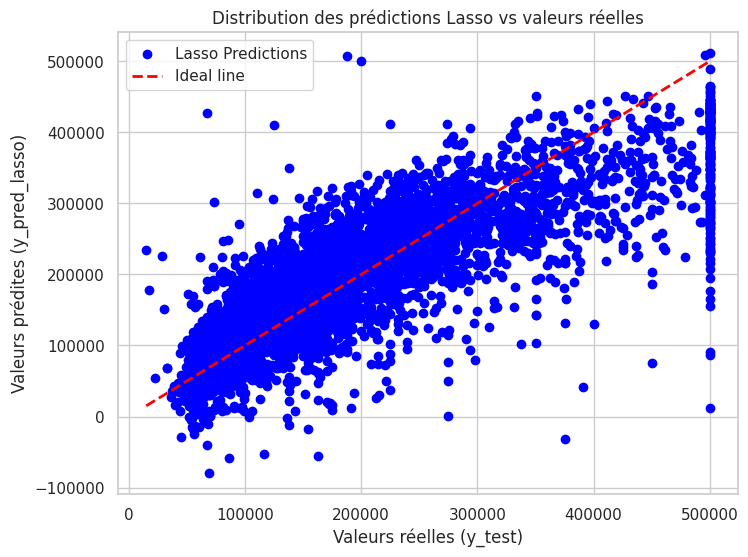

In [34]:
# Visualisation des valeurs réelles vs prédictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lasso, color='blue', label='Lasso Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linestyle='--', linewidth=2, label='Ideal line')
plt.xlabel('Valeurs réelles (y_test)')
plt.ylabel('Valeurs prédites (y_pred_lasso)')
plt.title('Distribution des prédictions Lasso vs valeurs réelles')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
# ⚠️ Utiliser les données transformées (X_train_transformed, X_test_transformed)
model_ne = LinearRegression()

# Entraînement du modèle
model_ne.fit(X_train_transformed, y_train)

# Prédictions sur le jeu de test
y_pred_ne = model_ne.predict(X_test_transformed)

# Évaluation du modèle
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_ne))

# Intercept et coefficients
print("Intercept (biais):", model_ne.intercept_)
print("Theta :", model_ne.coef_)

# Calcul du R² ajusté
n = len(y_test)   # nombre d'observations
k = X_test_transformed.shape[1]  # nombre de variables explicatives
normal_r2 = r2_score(y_test, y_pred_ne)
normal_r2_adjusted = 1 - (1 - normal_r2) * (n - 1) / (n - k - 1)

print('R²: %.2f' % normal_r2)
print(f"Adjusted R²: {normal_r2_adjusted:.2f}")




Mean squared error: 4912808680.13
Intercept (biais): 235277.04797678307
Theta : [-51655.80697951 -52610.46179262  16460.01051645 -29041.52107192
  65967.14506871 -49984.46205593  17531.33674876  81363.96489324
 -16310.41330969 -50954.19269139 107529.07525203 -25595.01150068
 -14669.45775028]
R²: 0.63
Adjusted R²: 0.62


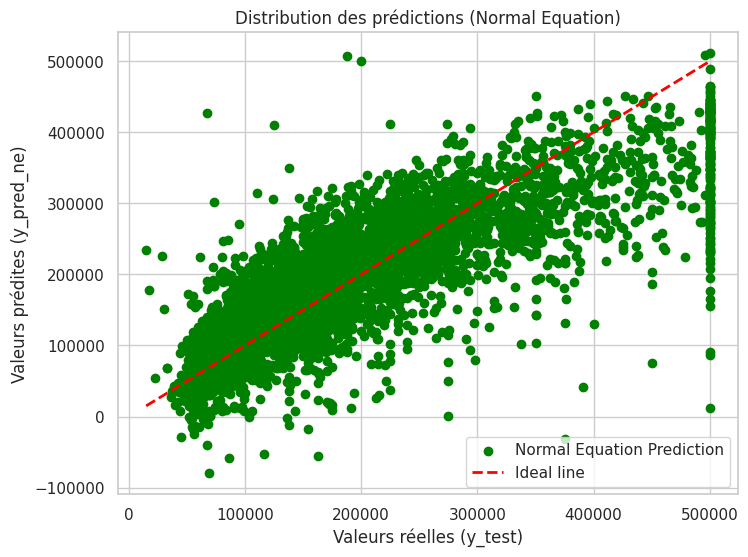

In [36]:
# Visualisation des valeurs réelles vs prédictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ne, color='green', label='Normal Equation Prediction')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linestyle='--', linewidth=2, label='Ideal line')
plt.xlabel('Valeurs réelles (y_test)')
plt.ylabel('Valeurs prédites (y_pred_ne)')
plt.title('Distribution des prédictions (Normal Equation)')
plt.legend()
plt.grid(True)
plt.show()

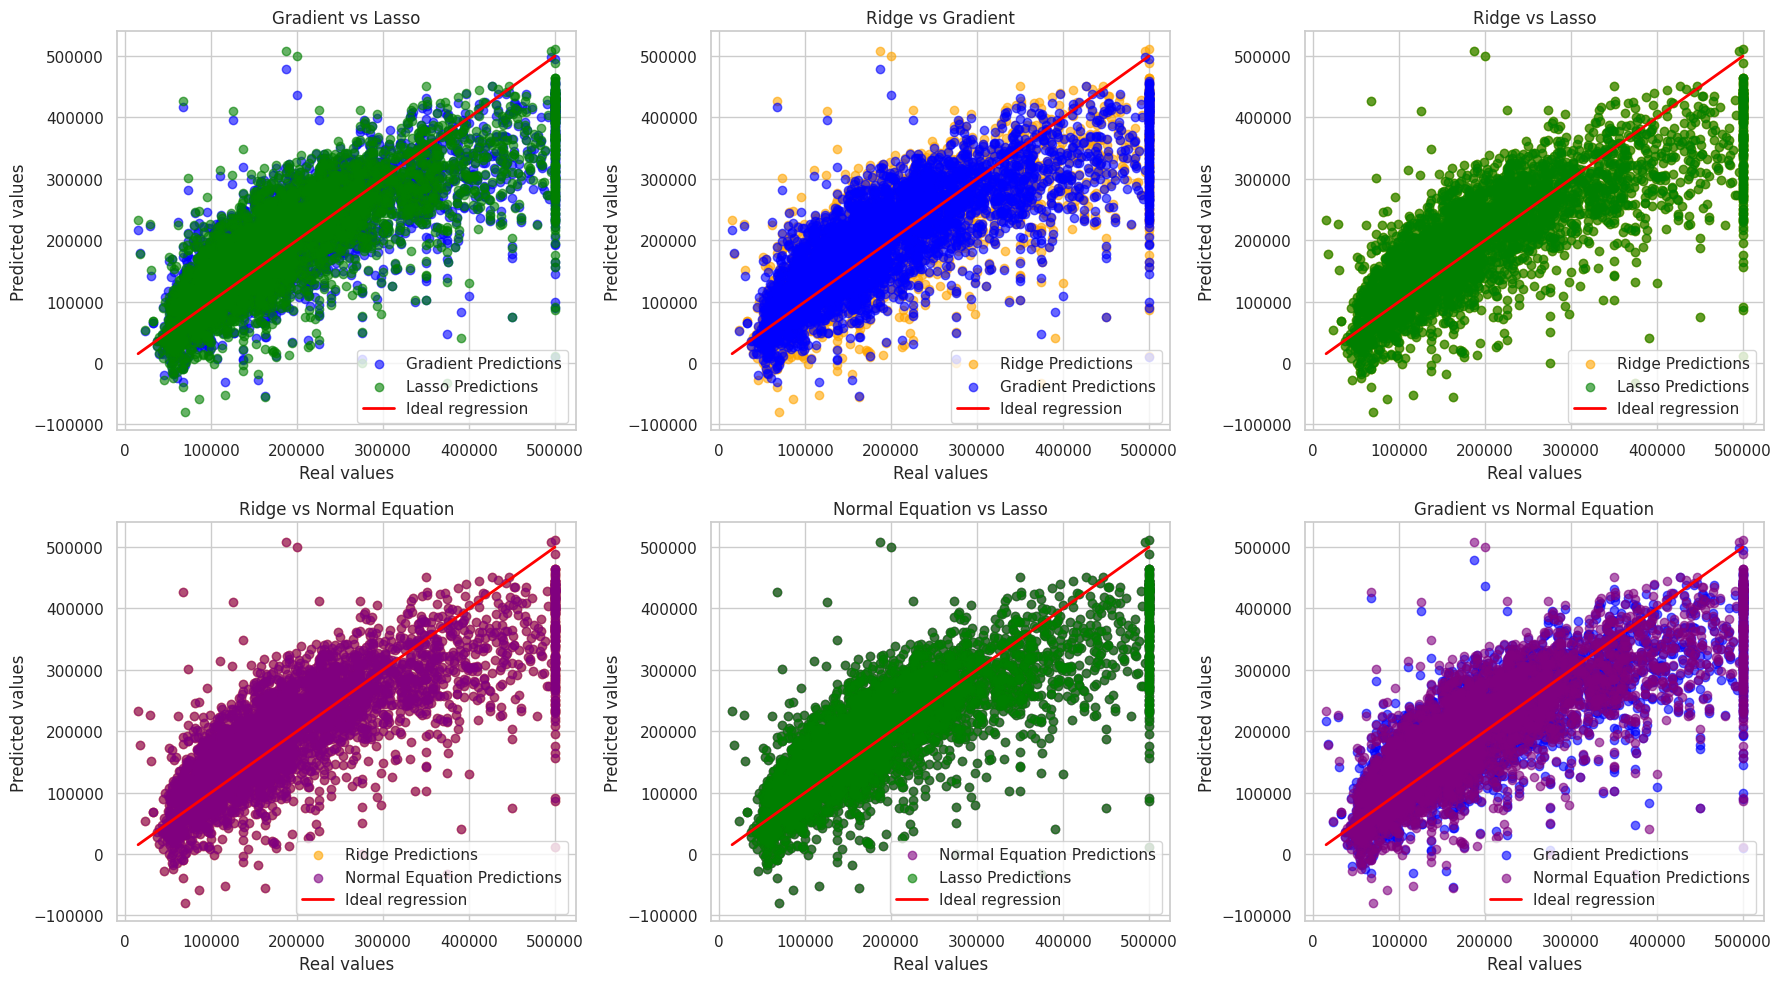

In [37]:
# Gradient descent predictions (avec données transformées)
X_test_with_bias = np.concatenate((np.ones((X_test_transformed.shape[0], 1)), X_test_transformed), axis=1)
y_pred = np.dot(X_test_with_bias, theta)

# Création de la figure et des sous-graphiques
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Comparaison Gradient vs Lasso
axs[0, 0].scatter(y_test, y_pred, color='blue', alpha=0.6, label='Gradient Predictions')
axs[0, 0].scatter(y_test, y_pred_lasso, color='green', alpha=0.6, label='Lasso Predictions')
axs[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
               color='red', linewidth=2, label='Ideal regression')
axs[0, 0].set_title('Gradient vs Lasso')
axs[0, 0].set_xlabel('Real values')
axs[0, 0].set_ylabel('Predicted values')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Comparaison Ridge vs Gradient
axs[0, 1].scatter(y_test, y_pred_ridge, color='orange', alpha=0.6, label='Ridge Predictions')
axs[0, 1].scatter(y_test, y_pred, color='blue', alpha=0.6, label='Gradient Predictions')
axs[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
               color='red', linewidth=2, label='Ideal regression')
axs[0, 1].set_title('Ridge vs Gradient')
axs[0, 1].set_xlabel('Real values')
axs[0, 1].set_ylabel('Predicted values')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Comparaison Ridge vs Lasso
axs[0, 2].scatter(y_test, y_pred_ridge, color='orange', alpha=0.6, label='Ridge Predictions')
axs[0, 2].scatter(y_test, y_pred_lasso, color='green', alpha=0.6, label='Lasso Predictions')
axs[0, 2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
               color='red', linewidth=2, label='Ideal regression')
axs[0, 2].set_title('Ridge vs Lasso')
axs[0, 2].set_xlabel('Real values')
axs[0, 2].set_ylabel('Predicted values')
axs[0, 2].legend()
axs[0, 2].grid(True)

# Comparaison Ridge vs Normal Equation
axs[1, 0].scatter(y_test, y_pred_ridge, color='orange', alpha=0.6, label='Ridge Predictions')
axs[1, 0].scatter(y_test, y_pred_ne, color='purple', alpha=0.6, label='Normal Equation Predictions')
axs[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
               color='red', linewidth=2, label='Ideal regression')
axs[1, 0].set_title('Ridge vs Normal Equation')
axs[1, 0].set_xlabel('Real values')
axs[1, 0].set_ylabel('Predicted values')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Comparaison Normal Equation vs Lasso
axs[1, 1].scatter(y_test, y_pred_ne, color='purple', alpha=0.6, label='Normal Equation Predictions')
axs[1, 1].scatter(y_test, y_pred_lasso, color='green', alpha=0.6, label='Lasso Predictions')
axs[1, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
               color='red', linewidth=2, label='Ideal regression')
axs[1, 1].set_title('Normal Equation vs Lasso')
axs[1, 1].set_xlabel('Real values')
axs[1, 1].set_ylabel('Predicted values')
axs[1, 1].legend()
axs[1, 1].grid(True)

# Comparaison Gradient vs Normal Equation
axs[1, 2].scatter(y_test, y_pred, color='blue', alpha=0.6, label='Gradient Predictions')
axs[1, 2].scatter(y_test, y_pred_ne, color='purple', alpha=0.6, label='Normal Equation Predictions')
axs[1, 2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
               color='red', linewidth=2, label='Ideal regression')
axs[1, 2].set_title('Gradient vs Normal Equation')
axs[1, 2].set_xlabel('Real values')
axs[1, 2].set_ylabel('Predicted values')
axs[1, 2].legend()
axs[1, 2].grid(True)

# Affichage
plt.tight_layout()
plt.show()


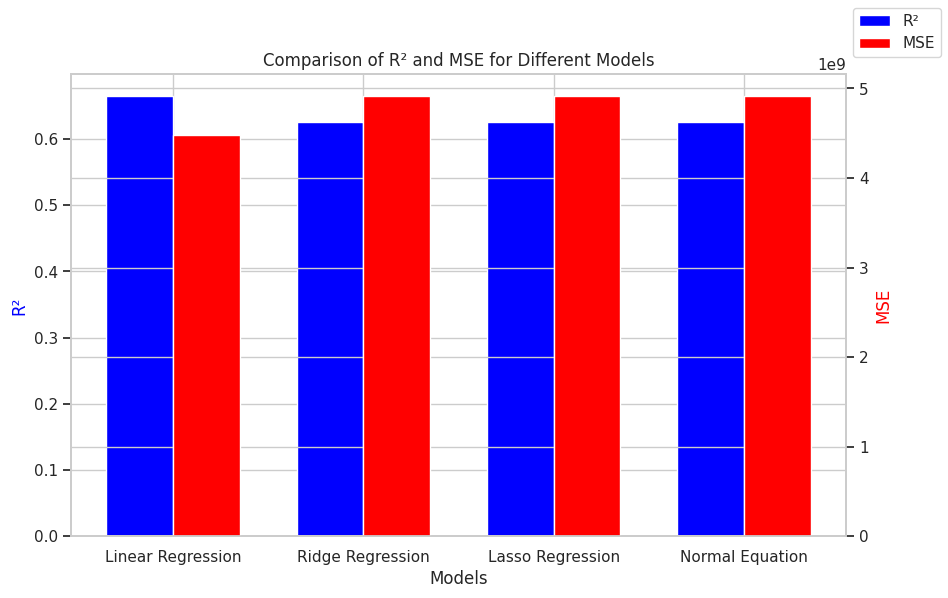

In [38]:

# Store the R² and MSE values for each model
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Normal Equation']
r2_values = [r2, ridge_r2, lasso_r2, r2_score(y_test, y_pred_ne)]
mse_values = [mse, ridge_mse, lasso_mse, mean_squared_error(y_test, y_pred_ne)]

# Positions des barres
x = np.arange(len(models))
width = 0.35

# Création de la figure
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()  # second axe Y

# Barres pour R² (axe gauche)
bars1 = ax1.bar(x - width/2, r2_values, width, label='R²', color='blue')

# Barres pour MSE (axe droit)
bars2 = ax2.bar(x + width/2, mse_values, width, label='MSE', color='red')

# Labels et titres
ax1.set_xlabel('Models')
ax1.set_ylabel('R²', color='blue')
ax2.set_ylabel('MSE', color='red')
ax1.set_title('Comparison of R² and MSE for Different Models')
ax1.set_xticks(x)
ax1.set_xticklabels(models)

# Légende combinée
fig.legend(loc="upper right")

# Affichage
plt.show()


In [39]:
model1 = LinearRegression()  # Linear regression using the normal equation
model2 = SGDRegressor(max_iter=1000, tol=1e-3, learning_rate='constant', eta0=0.01)  # Linear regression using gradient descent
model3 = RandomForestRegressor(n_estimators=100, random_state=42)  # Random Forest
model4 = GradientBoostingRegressor(n_estimators=100, random_state=42)  # Gradient Boosting
# List of models for Voting and Stacking
models = [('lr', model1), ('sgd', model2), ('rf', model3), ('gb', model4)]

In [40]:
# Création du Voting Regressor avec tes modèles
voting_model = VotingRegressor(estimators=models)

# Entraînement sur les données transformées
voting_model.fit(X_train_transformed, y_train)

# Prédictions sur le test set
voting_pred = voting_model.predict(X_test_transformed)

# Évaluation
print('Voting R²: %.2f' % r2_score(y_test, voting_pred))
print("Voting Mean Squared Error: %.2f" % mean_squared_error(y_test, voting_pred))

Voting R²: 0.74
Voting Mean Squared Error: 3385706644.91


# **Stacking**

In [41]:

stacking_model = StackingRegressor(
    estimators=models,
    final_estimator=LinearRegression()
)

# Entraînement sur les données transformées
stacking_model.fit(X_train_transformed, y_train)

# Prédictions sur le test set
stacking_pred = stacking_model.predict(X_test_transformed)

# Évaluation
print('Stacking R²: %.2f' % r2_score(y_test, stacking_pred))
print("Stacking Mean Squared Error: %.2f" % mean_squared_error(y_test, stacking_pred))


Stacking R²: 0.81
Stacking Mean Squared Error: 2424280999.08


# **Bagging**

In [42]:
# Base model: Decision Tree
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)

# Bagging Regressor (utilise base_estimator si ta version sklearn < 1.2)
bagging_tree_model = BaggingRegressor(estimator=tree_model, n_estimators=200, random_state=42)

# Entraînement sur les données transformées
bagging_tree_model.fit(X_train_transformed, y_train)

# Prédictions sur le test set
bagging_tree_pred = bagging_tree_model.predict(X_test_transformed)

# Évaluation
print('Bagging R²: %.2f' % r2_score(y_test, bagging_tree_pred))
print("Bagging Mean Squared Error: %.2f" % mean_squared_error(y_test, bagging_tree_pred))

Bagging R²: 0.63
Bagging Mean Squared Error: 4790987710.33


**Boosting**

In [43]:
# Gradient Boosting Regressor
boosting_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Entraînement sur les données transformées
boosting_model.fit(X_train_transformed, y_train)

# Prédictions sur le test set
boosting_pred = boosting_model.predict(X_test_transformed)

# Évaluation
print('Boosting R²: %.2f' % r2_score(y_test, boosting_pred))
print("Boosting Mean Squared Error: %.2f" % mean_squared_error(y_test, boosting_pred))


Boosting R²: 0.76
Boosting Mean Squared Error: 3158260968.42


**XGBoost**

In [44]:
# Creating the XGBoost model
xgboost_model = xgb.XGBRegressor(n_estimators=100, random_state=42)

# Training the model on transformed data
xgboost_model.fit(X_train_transformed, y_train)

# Predictions and evaluation
xgboost_pred = xgboost_model.predict(X_test_transformed)

# Évaluation
print('XGBoost R²: %.2f' % r2_score(y_test, xgboost_pred))
print("XGBoost Mean Squared Error: %.2f" % mean_squared_error(y_test, xgboost_pred))

XGBoost R²: 0.83
XGBoost Mean Squared Error: 2214234199.37


**Random forests**

In [45]:
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entraînement sur les données transformées
rf_model.fit(X_train_transformed, y_train)

# Prédictions sur le test set
rf_pred = rf_model.predict(X_test_transformed)

# Évaluation
print('Random Forest R²: %.2f' % r2_score(y_test, rf_pred))
print("Random Forest Mean Squared Error: %.2f" % mean_squared_error(y_test, rf_pred))

Random Forest R²: 0.81
Random Forest Mean Squared Error: 2428964199.01


**Cross validation**

In [46]:
# Cross-validation for voting model
voting_cv_scores = cross_val_score(voting_model, X_transformed, y, cv=5, scoring='r2')
print("Voting CV R²: %.2f ± %.2f" % (voting_cv_scores.mean(), voting_cv_scores.std()))

# Cross-validation for stacking model
stacking_cv_scores = cross_val_score(stacking_model, X_transformed, y, cv=5, scoring='r2')
print("Stacking CV R²: %.2f ± %.2f" % (stacking_cv_scores.mean(), stacking_cv_scores.std()))

# Cross-validation for bagging model
bagging_cv_scores = cross_val_score(bagging_tree_model, X_transformed, y, cv=5, scoring='r2')
print("Bagging CV R²: %.2f ± %.2f" % (bagging_cv_scores.mean(), bagging_cv_scores.std()))

# Cross-validation for boosting model
boosting_cv_scores = cross_val_score(boosting_model, X_transformed, y, cv=5, scoring='r2')
print("Boosting CV R²: %.2f ± %.2f" % (boosting_cv_scores.mean(), boosting_cv_scores.std()))

# Cross-validation for Random Forest model
rf_cv_scores = cross_val_score(rf_model, X_transformed, y, cv=5, scoring='r2')
print("Random Forest CV R²: %.2f ± %.2f" % (rf_cv_scores.mean(), rf_cv_scores.std()))


Voting CV R²: 0.61 ± 0.09
Stacking CV R²: 0.59 ± 0.08
Bagging CV R²: 0.50 ± 0.12
Boosting CV R²: 0.59 ± 0.09
Random Forest CV R²: 0.51 ± 0.19


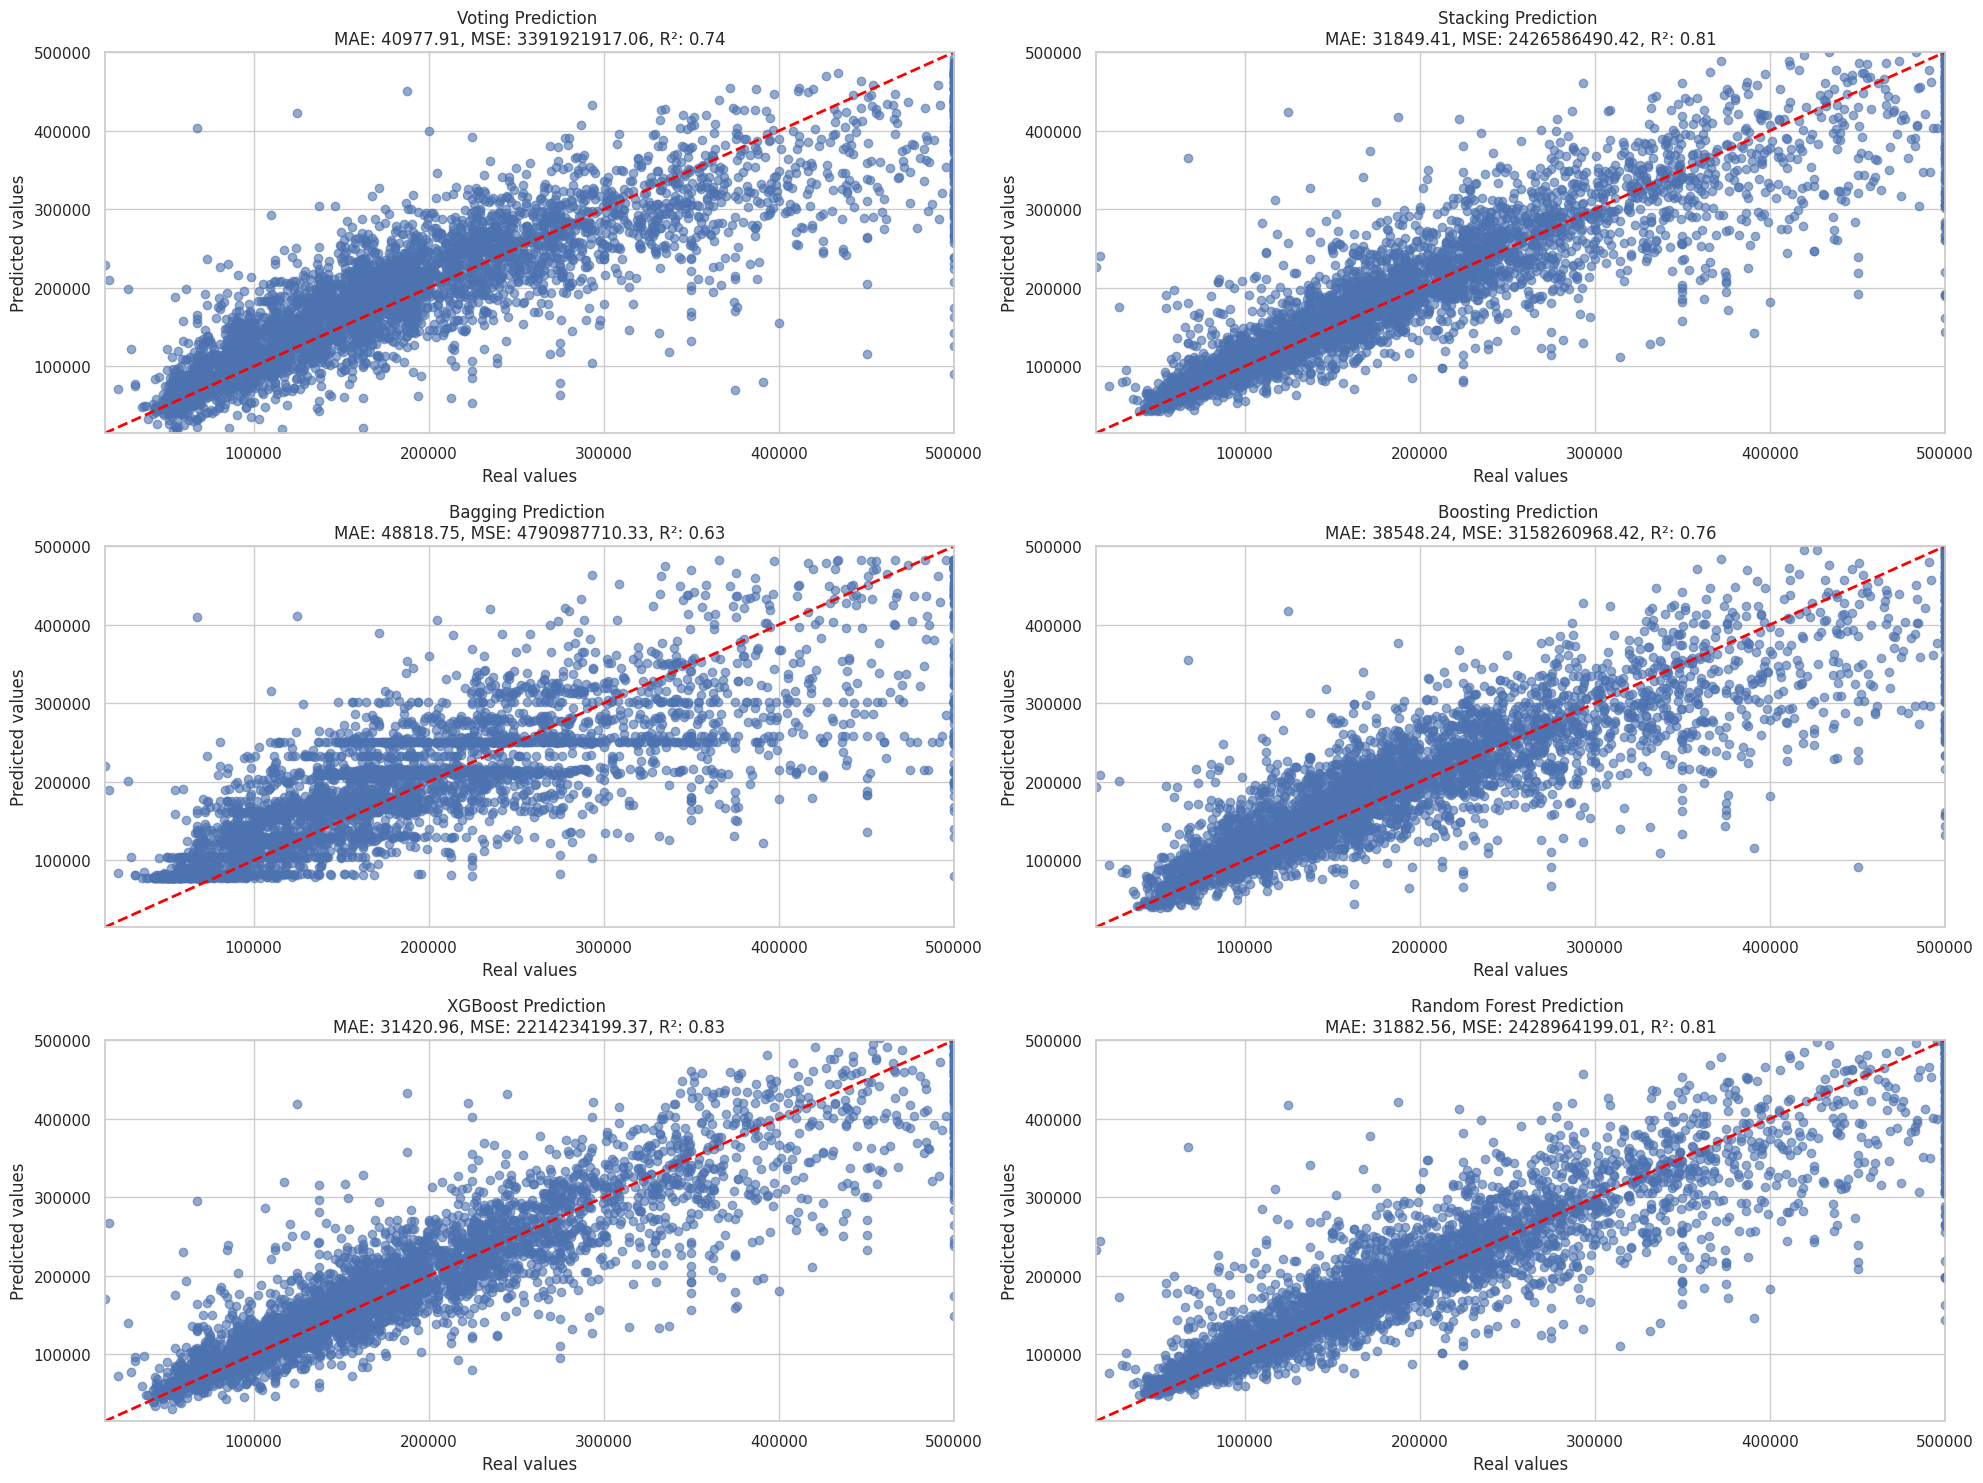

In [47]:

# List of models and their names
models = {
    "Voting": voting_model,
    "Stacking": stacking_model,
    "Bagging": bagging_tree_model,
    "Boosting": boosting_model,
    "XGBoost": xgboost_model,
    "Random Forest": rf_model,
}

# Create a figure for the visualizations
plt.figure(figsize=(20, 15))

# Iterate over each model
for i, (name, model) in enumerate(models.items(), 1):
    # Train the model (on transformed data)
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_test_transformed)

    # Calculate the metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Create a subplot
    plt.subplot(3, 2, i)
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             color='red', linestyle='--', linewidth=2)  # Ligne idéale
    plt.title(f'{name} Prediction \nMAE: {mae:.2f}, MSE: {mse:.2f}, R²: {r2:.2f}')
    plt.xlabel('Real values')
    plt.ylabel('Predicted values')
    plt.xlim(y_test.min(), y_test.max())
    plt.ylim(y_test.min(), y_test.max())
    plt.grid(True)

# Adjust layout
plt.tight_layout()
# Save all the plots into a single image
plt.savefig('all_models_predictions.png', dpi=300)
plt.show()


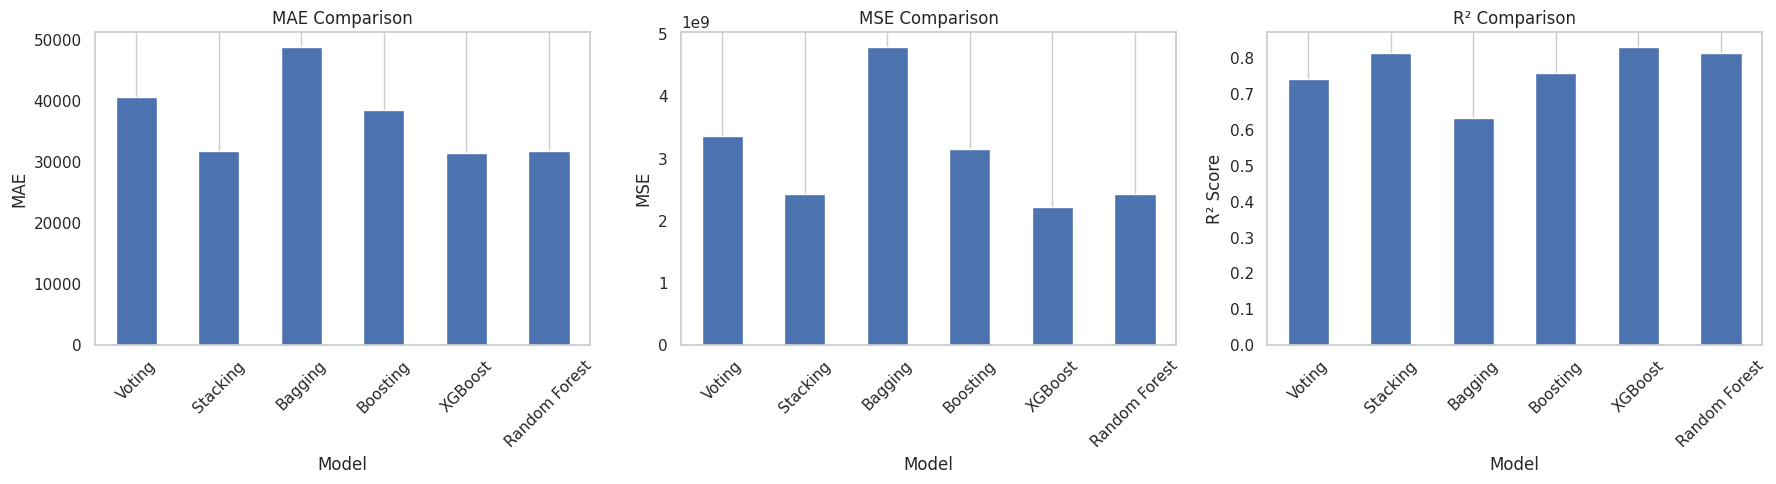

In [48]:
metrics = {
    "Model": [],
    "MAE": [],
    "MSE": [],
    "R²": []
}

for name, model in models.items():
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_test_transformed)

    metrics["Model"].append(name)
    metrics["MAE"].append(mean_absolute_error(y_test, y_pred))
    metrics["MSE"].append(mean_squared_error(y_test, y_pred))
    metrics["R²"].append(r2_score(y_test, y_pred))
metrics_df = pd.DataFrame(metrics)

# Create separate bar plots for each metric
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

metrics_df.plot(x="Model", y="MAE", kind="bar", ax=axes[0], legend=False)
axes[0].set_title("MAE Comparison")
axes[0].set_ylabel("MAE")

metrics_df.plot(x="Model", y="MSE", kind="bar", ax=axes[1], legend=False)
axes[1].set_title("MSE Comparison")
axes[1].set_ylabel("MSE")

metrics_df.plot(x="Model", y="R²", kind="bar", ax=axes[2], legend=False)
axes[2].set_title("R² Comparison")
axes[2].set_ylabel("R² Score")

for ax in axes:
    ax.set_xticklabels(metrics_df["Model"], rotation=45)
    ax.grid(axis='y')

plt.tight_layout()
plt.show()


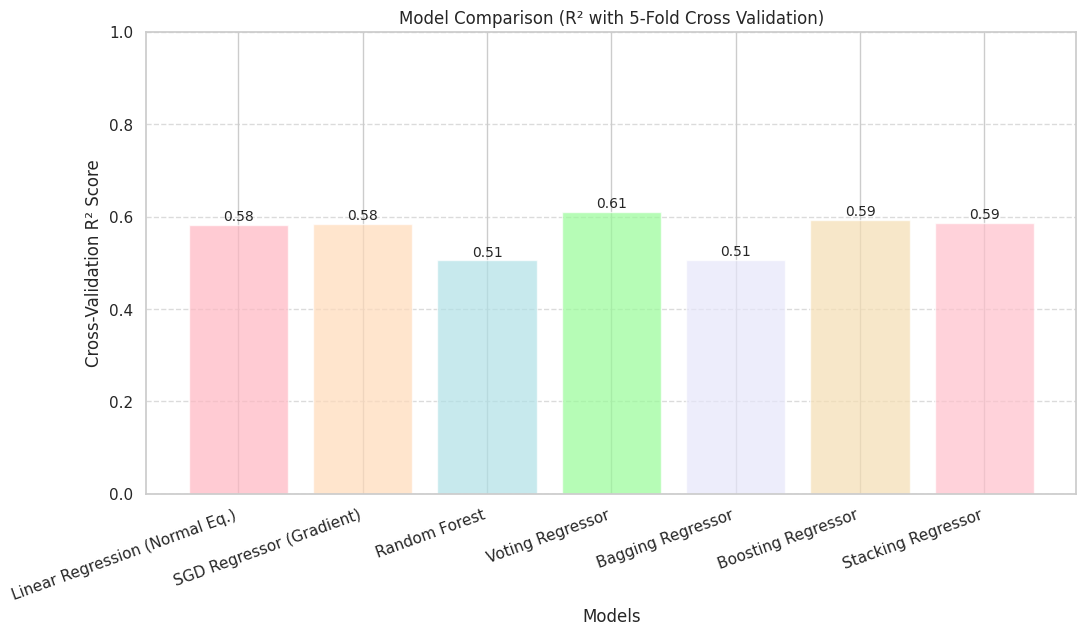

In [49]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, BaggingRegressor, GradientBoostingRegressor, StackingRegressor

# Define base models
model1 = LinearRegression()
model2 = SGDRegressor(random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
boosting_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
bagging_tree_model = BaggingRegressor(n_estimators=100, random_state=42)

# Voting Regressor
voting_model = VotingRegressor(estimators=[
    ('lr', model1),
    ('sgd', model2),
    ('rf', rf_model),
    ('gb', boosting_model)
])

# Stacking Regressor
stacking_model = StackingRegressor(
    estimators=[
        ('lr', model1),
        ('sgd', model2),
        ('rf', rf_model),
        ('gb', boosting_model)
    ],
    final_estimator=LinearRegression()
)

models = {
    "Linear Regression (Normal Eq.)": model1,
    "SGD Regressor (Gradient)": model2,
    "Random Forest": rf_model,
    "Voting Regressor": voting_model,
    "Bagging Regressor": bagging_tree_model,
    "Boosting Regressor": boosting_model,
    "Stacking Regressor": stacking_model
}

cv_r2_scores = []

# Compute R² scores for each model with cross-validation
for name, model in models.items():
    cv_r2 = cross_val_score(model, X_transformed, y, cv=5, scoring='r2').mean()
    cv_r2_scores.append(cv_r2)

# Create the plot
x = np.arange(len(models))  # Model positions
pastel_colors = ["#FFB6C1", "#FFDAB9", "#B0E0E6", "#98FB98", "#E6E6FA", "#F5DEB3", "#FFC0CB"]  # Soft pastel colors

fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(x, cv_r2_scores, color=pastel_colors, alpha=0.7)

# Add labels and title
ax.set_xlabel("Models")
ax.set_ylabel("Cross-Validation R² Score")
ax.set_title("Model Comparison (R² with 5-Fold Cross Validation)")
ax.set_xticks(x)
ax.set_xticklabels(models.keys(), rotation=20, ha="right")

# Display values on bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', fontsize=10)

# Show the plot
plt.ylim(0, 1)  # Keep values within range
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
